## Quantum Machine Learning (QML) for Sine function Learrning

The goal of this task is to develop your own model and use it to learn the sine function on the interval $[0, 2π]$. First, we discretize the interval with a suitable number of points (equally spaced  points) and use the values of the sine function at these discretization points as labels. We implement a Quantum Machine Learning model which reproduces the values of the sine function.


## QML Implementation
First, we need to know what kind of the problem we are going to solve. Is it a problem that is intrinsically quantum (such as a chemical problem) where we want to use machine learning to get a solution? Or is it a problem that we can find in classical machine learning where we want to use quantum computing to solve it? Knowing the problem can give us ideas on how to encode it into circuits, and how to combine classical and quantum techniques to find a solution.

This technique is based on the fact that we can find the gradient of a quantum circuit with respect to the parameters controlling the operations in it. With the ability to calculate the gradients of quantum circuits, we use a quantum circuit as a node (a QNode) in a classical neural network. 

The place where we will run your program is called a “device”. Since circuits can have different numbers of qubits (or wires), it’s important to define this when youwe defineour device.

After defining our device, we can define our QNode, which binds together the device with a Python function that implements a quantum circuit and returns a measurement. This syntax makes it easy to include parameters in your circuits. In the end the quantum computation is just a function that can depend on inputs and produces an output.

We can then define a cost function (which is also just a normal Python function) based on the output of our QNode. Hybrid models often include preprocessing or postprocessing, which can be arbitrarily complex. This means that we can add additional functions as simple as adding a constant or as complex as adding a full neural network. If we want to use a neural network we can define it as a separate function, and then use it within our cost function.

The final step is to perform the optimization over the cost function. PennyLane has a lot of optimizers which we can choose from. The optimization part involves choosing an optimizer and a step size, making an initial guess for the value of our parameters, and then iterating over a number of defined steps. Finally we can visualize the results of the optimization as a graph or plot.

To create a quantum machine learning program in PennyLane we need to:

#### 1. Define a device including the device type and the number of wires.

#### 2. Define your quantum circuit (QNode).

#### 3. Define pre-/postprocessing (such as a neural network). (Optional)

#### 4. Define a cost function which takes in your quantum circuit and your neural network (if you have one).

#### 5. Perform the optimization 
    i. Choose an optimizer.

    ii. Choose a step size. 

    iii. Make an initial guess for the value of your parameters. 

    iv. Iterate over  a number of defined steps.

#### 6. Visualize the results by printing or graphing them! 


## Analytical approach

First, we consider the simplest QML circuit with 1-qubit including an Rx gate as an encoding part and a parametric Ry gate as a Parametric Quantum circuit (PQC or Ansatz). The Rx($\theta_i$) embeds one classical data point $\theta_i $, that is rescaled to lie between 0 and 2π, into a single qubit (Angle Embedding). Our Ansatz consists of only one parametric gate Ry($\theta$) and the $\theta$ is a parameter that obtained by classical optimizer such that the QML model can predicts the label of new input data correctly. 

### Learning Cosine function 
We show that cosine function can be learned by this simple QML circuit. We select the training dataset from interval $[0,2\pi] uniformly, i.e. 

$$\theta_i \in \{0, \frac {2 \pi}{N_{train} - 1}, \frac {4 \pi}{N_{train} - 1}, \dots, 2\pi\} $$ 

where $ N_{train}$ is the number of training dataset samples. The correspending labels to the training dataset $\theta_i = \frac {2 i \pi}{N_{train} - 1} $ are $ f(\theta_i),  i = 0, 1, ..., N_{train} -1 . $ 

Assume that the states of $ |\psi^{i}_{enc}〉 $ and $ |\psi^{i}(\theta)〉 $ are the embedded quantum state corresponding to the data sample $\theta_i$ and the output state of Ansatz, respectively
. The result of measurement with Pauli-Z observable is expectation value of the $ |\psi^{i}(\theta)〉 $ :
$$ E[|\psi^{i}〉] = <\psi^{i}|\sigma_z|\psi^i〉 $$

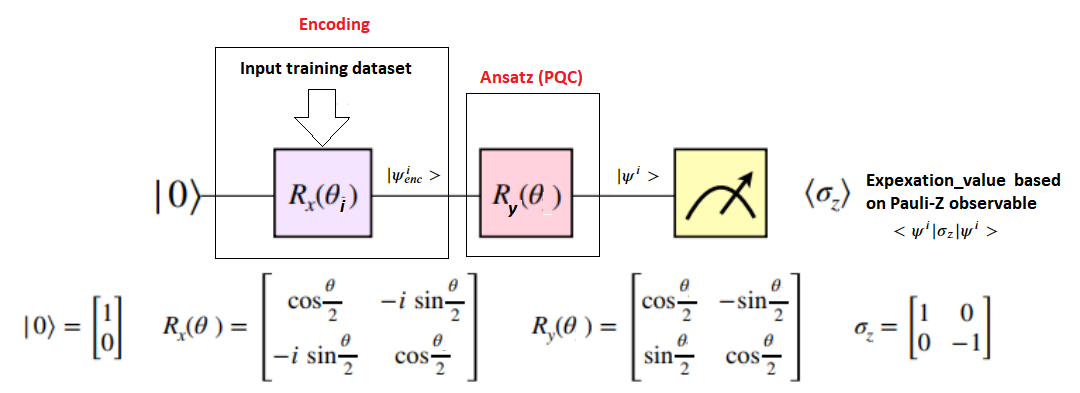

For input data sample $\theta_i$, we obtain the $ <\psi^{i}|\sigma_z|\psi^i〉$ as follows.

It is easy to show: 

$$ |\psi^{i}_{enc}> = R_x(\theta_i)|0〉  = \cos(\theta_i/2)\:|0〉 - j\sin(\theta_i/2)\: |1〉 $$

where $j = \sqrt{-1}$ as used in electrical engineering.

We have $ |\psi^{i}〉 = R_y(\theta) |\psi^{i}_{enc}〉  $. So, the expectation value related to data sample $\theta_i$ is obtained as

$$ <\psi^{i}|\sigma_z|\psi^i〉 =  <\psi^{i}_{enc}|R_y(\theta)^{\dagger}\sigma_z R_y(\theta)|\psi^i_{enc}〉  $$

We need to calculate $ R_y(\theta)|\psi^i_{enc}〉$ as follows

$$ R_y(\theta)|\psi^i_{enc}〉 =  R_y(\theta) \;[\cos(\theta_i/2)\:|0〉 - j\sin(\theta_i/2)\: |1〉] = a\:|0〉 +b\:|1〉 $$
where
$$ a = \cos(\theta_i/2)\:\cos(\theta/2) + j\sin(\theta_i/2)\: \sin(\theta/2) $$
$$ b = \cos(\theta_i/2)\:\sin(\theta/2) - j\sin(\theta_i/2)\: \cos(\theta/2) $$

It is obvious that $ <\psi^{i}_{enc}|R_y(\theta)^{\dagger} = a^* \, <0| + b^* \,<1|. $

To calculate expectation value, it is necessary to calculate $ \: \sigma_z R_y(\theta)|\psi^i_{enc}〉$:

$$\sigma_z R_y(\theta)|\psi^i_{enc}〉 = \sigma_z \: (a\:|0〉 +b\:|1〉)= \:a\:|0〉 - b\:|1〉 $$

Therefore, the measured expectation value yields:

$$ (expectation\;value)^i =\; <\psi^{i}_{enc}|R_y(\theta)^{\dagger}\sigma_z R_y(\theta)|\psi^i_{enc}〉 \; = |a|^2 - |b|^2  $$

After substituing a and b and some manipulation, we will obtain  

$$ (expectation\;value)^i = \cos(\theta_i) \: \cos(\theta) $$

It is observed that with selection the optimal value of parameter ($ \theta = 0 $) (found by optimizer), the measurement result will be proportional to $\cos(\theta_i)$, So this simple QML circuit can easily learn the Cosine function. 



### Learning Sine function
If we add a parametric gate $ R_x(\theta)$ to the previous QML circuit, it can learn Sine function.

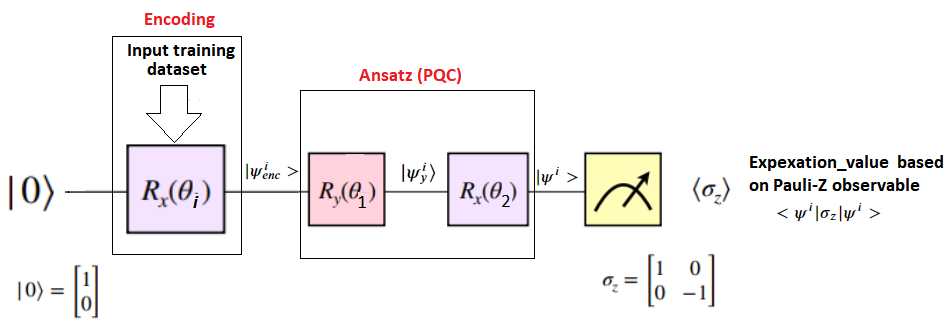

Now, we have two optimizing parameters $ \theta_1 ,\theta_2$ that the optimized values must be found by a classical optimizer.

We follow similar approach to the analysis of previous circuit to obtain the expectation value. As seen before, we have

$$ |\psi^i_{y}〉 = R_y(\theta_1)|\psi^i_{enc}〉 = a_1\:|0〉 +b_1\:|1〉  $$
where

$$ a_1 = \cos(\theta_i/2)\:\cos(\theta_1/2) + j\sin(\theta_i/2)\: \sin(\theta_1/2) $$
$$ b_1 = \cos(\theta_i/2)\:\sin(\theta_1/2) - j\sin(\theta_i/2)\: \cos(\theta_1/2) $$

We have $ |\psi^{i}〉 = R_x(\theta_2) |\psi^{i}_{y}〉  $. So, the expectation value associated to data sample $\theta_i$ is obtained as

$$ <\psi^{i}|\sigma_z|\psi^i〉 =  <\psi^{i}_{y}|R_x(\theta_2)^{\dagger}\sigma_z R_x(\theta_2)|\psi^i_{y}〉  $$

For calculation of the expectation value, We need to obtain $ R_x(\theta_2)|\psi^i_{y}〉$ as follows

$$ R_x(\theta_2)|\psi^i_{y}〉 = a_1 R_x(\theta_2) \:|0〉 + b_1 R_x(\theta_2)\: |1〉 $$

After some simple calculations:

$$ R_x(\theta_2)|\psi^i_{y}〉 = \; a_2\:|0〉 +b_2\:|1〉 $$
where

$$ a_2 = a_1\:\cos(\theta_2/2) - jb_1\: \sin(\theta_2/2) $$
$$ b_2 =-ja_1\:\sin(\theta_2/2) + b_1\: \cos(\theta_2/2) $$

To calculate expectation value, it is necessary to calculate $ \: \sigma_z R_x(\theta_2)|\psi^i_{y}〉$. 

$$\sigma_z R_x(\theta_2)|\psi^i_{y}〉 = \sigma_z \: (a_2\:|0〉 +b_2\:|1〉)= \:a_2\:|0〉 - b_2\:|1〉 $$

It is obvious that $ <\psi^{i}_{y}|R_x(\theta_2)^{\dagger} = a_2^* \, <0| + b_2^* \,<1|. $

Therefore, the measured expectation value yields:

$$ (expectation\;value)^i =\; <\psi^{i}_{y}|R_x(\theta_2)^{\dagger}\sigma_z R_x(\theta_2)|\psi^i_{y}〉 \; = (a_2^* \, <0| + b_2^* \,<1|)\,(\:a_2\:|0〉 - b_2\:|1〉) =  |a_2|^2 - |b_2|^2  $$

where 
$$|a_2|^2 = a_2\:a^*_2 = (a_1\,\cos(\theta_2/2) - jb_1\: \sin(\theta_2/2))\:(a_1^*\,\cos(\theta_2/2) + jb_1^*\: \sin(\theta_2/2))$$

$$|b_2|^2 = b_2\:b^*_2 = (-ja_1\,\sin(\theta_2/2) + b_1\: \cos(\theta_2/2))\:(ja_1^*\,\sin(\theta_2/2) + b_1^*\: \cos(\theta_2/2))$$

After some manipulation, we obtain the expectation value as:

$$ (expectation\;value)^i = (|a_1|^2 - |b_1|^2)\cos(\theta_2) + 2 Im[b_1\,a^*_1]\:\sin(\theta_2) $$

Finally, after substituing $a_1$ and $b_1$ and some trigonometric calculations:

$$ (expectation\;value)^i = \:\cos(\theta_i)\cos(\theta_1)\cos(\theta_2)-\:\sin(\theta_i)\:\sin(\theta_2)$$

This is an interesting result, because with selection the optimal value of parameter ($ \theta_2 = 90^o $) (found by optimizer), the measurement result will be proportional to $\sin(\theta_i)$, So this QML circuit can easily learn the Sine function. 


## In this program we will train a circuit to model a sine function

## Step 0: Prepare your data 

#### Import my favourite libraries

In [1]:
# We import the necessary libraries
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

#### We create the training Data

In [2]:
N_data = 20 # N_data is number of input datapoints
# N_data input datapoints equally spaced from 0 to 2pi
X = np.linspace(0, 2*np.pi, N_data) # Training data

# We tell the optimizer that this is an input datapoint,
# and not a parameter to optimize over.
X.requires_grad = False

# The outputs for the input datapoints as labels for our datapoints follow a sine function
Y = np.sin(X) 

#### We create the test Data

In [3]:
N_test = N_data # N_test test datapoints, shifted from the training data by 0.2
# Since we're not optimizing over the test data we
# don't need to specify requires_grad = False
X_test = np.linspace(0.2, 2*np.pi+0.2, N_test)
Y_test = np.sin(X_test) # The labels for the test datapoints

## Step 1 - Create the device
Here we use the 'default.qubit' simulator and 1 qubit (wires=1)

In [4]:
# Create a device with 1 qubit
dev = qml.device('default.qubit', wires=1)

## Step 2 - Create the quantum circuit
1. Encode the input data as an RX rotation
2. Create RY and RX rotations based on the angles in 'params'
3. We return the expected value of a measurement along the Z axis 

In [5]:
@qml.qnode(dev) # Create a Qnode with 1 qubit
def quantum_circuit(datapoint, params):
    # Encode the input data as an RX rotation
    # Encoding (Angle Embedding)
    qml.RX(datapoint, wires=0)
    
    # Ansatz
    # qml.Rot(params[0], params[1], params[2], wires=0)   # Create a rotation based on the angles in "params"
    # increasing the parameters always is not led to better results but increasing depth (no. of Gates) maybe
    qml.RY(params[0], wires=0)
    qml.RX(params[1], wires=0)
        
    # We return the expected value of a measurement along the Z axis
    return qml.expval(qml.PauliZ(wires=0))

(<Figure size 600x200 with 1 Axes>, <Axes: >)

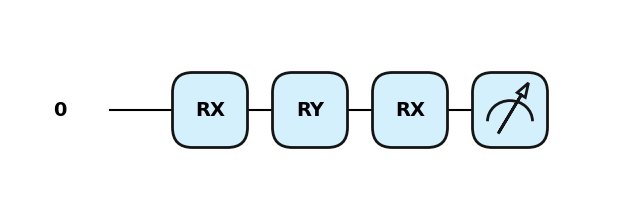

In [6]:
qml.draw_mpl(quantum_circuit, style='pennylane')(0.1, [0.2, 0.3])

## Step 3 - Classical Pre/Postprocessing
We want our quantum circuit to predict the label y for a specific datapoint x. This means that we want the circuit to learn the right value of params such that the expectation value of the qubit is the sine of the datapoint x.

Since we want to improve performance over the whole dataset, we want to know if a specific value of the parameter params produced a good output over all datapoints. We use a loss function to calculate the total loss over all datapoints for a single value of the parameters. 


In [7]:
def loss_func(predictions):
    # This is a postprocessing step. Here we use a least squares metric
    # based on the predictions of the quantum circuit and the outputs
    # of the training data points.

    total_losses = 0
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2
        total_losses += loss
    return total_losses

## Step 4 - Define your cost function, including any classical pre/postprocessing

In [8]:
def cost_fn(params):
    # We get the predictions of the quantum circuit for a specific
    # set of parameters along the entire input dataset
    predictions = [quantum_circuit(x, params)  for x in X]
    # We calculate the cost including any classical postprocessing
    cost = loss_func(predictions)
    return cost

## Steps 5.1 and 5.2  - We define the optimizer

In [9]:
opt = qml.GradientDescentOptimizer(stepsize=0.3)

## Step 5.3 We make an initial guess for the parameters

In [10]:
params = np.array([0.1,0.1],requires_grad=True)

## Step 5.4 - We iterate over a number of defined steps (100)

In [11]:
for i in range (200):
    # Over each step the parameters change to give a better cost
    params, prev_cost = opt.step_and_cost(cost_fn,params)
    if i%10 == 0:
         # We print the result after every 10 steps
        print(f'Step = {i} Cost = {cost_fn(params)}')

Step = 0 Cost = 30.305617047351006
Step = 10 Cost = 0.0006966534404278562
Step = 20 Cost = 0.0001694813086863686
Step = 30 Cost = 7.576278277355258e-05
Step = 40 Cost = 4.2922571114192376e-05
Step = 50 Cost = 2.7639433799926103e-05
Step = 60 Cost = 1.9291315795607792e-05
Step = 70 Cost = 1.4232600177584213e-05
Step = 80 Cost = 1.0935060518416738e-05
Step = 90 Cost = 8.665765399453272e-06
Step = 100 Cost = 7.037221712144374e-06
Step = 110 Cost = 5.828809835986569e-06
Step = 120 Cost = 4.907370571905595e-06
Step = 130 Cost = 4.188646501664606e-06
Step = 140 Cost = 3.6172008832857993e-06
Step = 150 Cost = 3.1553422293744617e-06
Step = 160 Cost = 2.7767163343055097e-06
Step = 170 Cost = 2.4624451767040537e-06
Step = 180 Cost = 2.198717833687293e-06
Step = 190 Cost = 1.975241086149805e-06


## Step 6 - Visualize the results

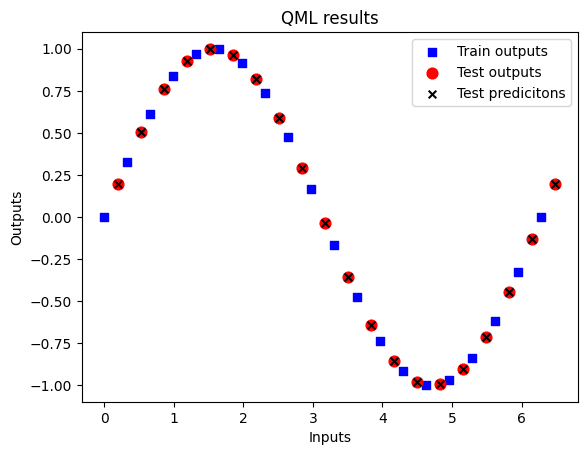

In [12]:
test_predictions = []
for x_test in X_test:
    prediction = quantum_circuit(x_test,params)
    test_predictions.append(prediction)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test,Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test,test_predictions, s=30, c='k', marker="x", label='Test predicitons')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right');
plt.show()

As you can see on the image above, we have the clear outline of a sine function. This shows that our model effectively learned to recognize the underlying pattern in our data.

##  Learning Cosine function

#### Create the training Data

In [13]:
N_data = 20 # N_data is number of input datapoints
# N_data input datapoints equally spaced from 0 to 2pi
X = np.linspace(0, 2*np.pi, N_data) # Training data

# We tell the optimizer that this is an input datapoint,
# and not a parameter to optimize over.
X.requires_grad = False

# The outputs for the input datapoints as labels for our datapoints follow a sine function
Y = np.cos(X) 

#### Create the test Data

In [14]:
from numpy import random
N_test = N_data # N_test test datapoints, We consider random values from 0 to 2pi 

X_test = np.random.rand(1, N_test)*2*np.pi
Y_test = np.cos(X_test) # The labels for the test datapoints

## Create the quantum circuit

(<Figure size 500x200 with 1 Axes>, <Axes: >)

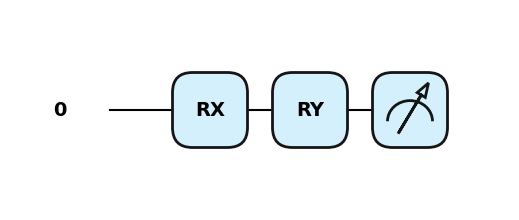

In [15]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev) # Create a Qnode with 1 qubit
def quantum_circuit(datapoint, params):
    # Encode the input data as an RX rotation
    qml.RX(datapoint, wires=0)
    
    # Ansatz
    qml.RY(params[0], wires=0) # only one RY gate for learning Cosine function
    return qml.expval(qml.PauliZ(wires=0))

qml.draw_mpl(quantum_circuit, style='pennylane')(0.1, [0.2])

## Classical Pre/Postprocessing

In [16]:
def loss_func(predictions):
    
    total_losses = 0
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2
        total_losses += loss
    return total_losses

def cost_fn(params):
    # We get the predictions of the quantum circuit for a specific
    # set of parameters along the entire input dataset
    predictions = [quantum_circuit(x, params)  for x in X]
    # We calculate the cost including any classical postprocessing
    cost = loss_func(predictions)
    return cost

## Perform the optimization

In [17]:
opt = qml.GradientDescentOptimizer(stepsize=0.3)
params = np.array([0.1],requires_grad=True)

for i in range (200):
    # Over each step the parameters change to give a better cost
    params, prev_cost = opt.step_and_cost(cost_fn,params)
    if i%10 == 0:
         # We print the result after every 10 steps
        print(f'Step = {i} Cost = {cost_fn(params)}')

Step = 0 Cost = 0.00023066930570389224
Step = 10 Cost = 8.887989091734456e-05
Step = 20 Cost = 4.7011284056414974e-05
Step = 30 Cost = 2.9091985069061453e-05
Step = 40 Cost = 1.9784226804475675e-05
Step = 50 Cost = 1.4331119392269243e-05
Step = 60 Cost = 1.0861673525696766e-05
Step = 70 Cost = 8.517375277838009e-06
Step = 80 Cost = 6.858912826500385e-06
Step = 90 Cost = 5.642377723910304e-06
Step = 100 Cost = 4.723472363909832e-06
Step = 110 Cost = 4.0123702636507205e-06
Step = 120 Cost = 3.4507679043766257e-06
Step = 130 Cost = 2.999477253691178e-06
Step = 140 Cost = 2.6313659648911758e-06
Step = 150 Cost = 2.327163625524952e-06
Step = 160 Cost = 2.0728770504644456e-06
Step = 170 Cost = 1.8581456448701006e-06
Step = 180 Cost = 1.6751653315604783e-06
Step = 190 Cost = 1.5179669454913896e-06


## Visualize the results

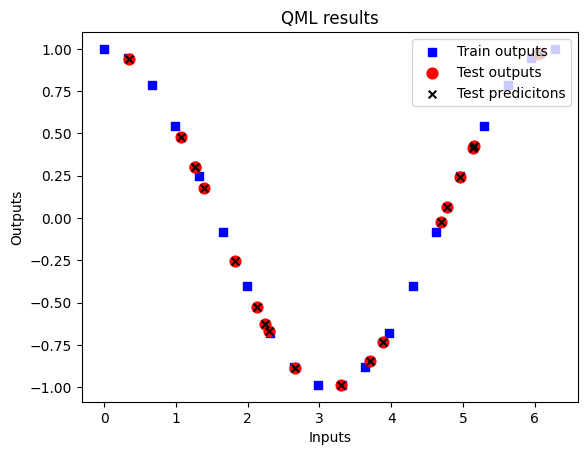

In [18]:
test_predictions = []
for x_test in X_test:
    prediction = quantum_circuit(x_test,params)
    test_predictions.append(prediction)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test,Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test,test_predictions, s=30, c='k', marker="x", label='Test predicitons')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right');
plt.show()

It is interesting that even with few training datapoints (N_train = 5), as we expected from the analytical approach, the proposed QML circuits learn Sine and Cosine functions very well.